In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

### Data Preparation

In [7]:
TrainDF = pd.read_csv("/Users/nikkkikong/Desktop/501 Assignment6 /Foodborne_NBtrain.csv")
TrainDF["Etiology"] = pd.Categorical(TrainDF["Etiology"])
# There should be only numeric varaibles when fitting NB and SVM model in Python
TrainDF = TrainDF.drop(["setting"], axis=1)
TrainDF = TrainDF.drop(["Etiology.Status"], axis=1)

TestDF = pd.read_csv("/Users/nikkkikong/Desktop/501 Assignment6 /Foodborne_NBtest.csv")
TestDF["Etiology"] = pd.Categorical(TestDF["Etiology"])
# There should be only numeric varaibles when fitting NB and SVM model in Python
TestDF = TestDF.drop(["setting"], axis=1)
TestDF = TestDF.drop(["Etiology.Status"], axis=1)

## Save labels
TestLabels=TestDF["Etiology"]
## remove labels
## Make a copy of TestDF
CopyTestDF=TestDF.copy()
TestDF = TestDF.drop(["Etiology"], axis=1)
## DF seperate TRAIN SET from the labels
TrainDF_nolabels=TrainDF.drop(["Etiology"], axis=1)
#print(TrainDF_nolabels)
TrainLabels=TrainDF["Etiology"]

In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.YlOrBr):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()


from sklearn.metrics import classification_report as clsr
def evaluate_model(model, X_test_data, y_test_labels):
    y_predicted_labels = model.predict(X_test_data)
    print(clsr(y_test_labels, y_predicted_labels))

### Multinomial Naive Bayes Classifier


The prediction from NB is:
['Other' 'Other' 'Other' 'Escherichia' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Escherichia' 'Norovirus'
 'Norovirus' 'Norovirus' 'Norovirus' 'Norovirus' 'Norovirus' 'Norovirus'
 'Other' 'Norovirus' 'Norovirus' 'Norovirus' 'Norovirus' 'Norovirus'
 'Norovirus' 'Norovirus' 'Salmonella' 'Salmonella' 'Norovirus' 'Norovirus'
 'Norovirus' 'Norovirus' 'Other' 'Norovirus' 'Other' 'Other' 'Norovirus'
 'Salmonella']

The actual labels are:
0           Other
1           Other
2           Other
3           Other
4           Other
5           Other
6           Other
7     Escherichia
8      Salmonella
9           Other
10          Other
11     Salmonella
12     Salmonella
13     Salmonella
14     Salmonella
15      Norovirus
16      Norovirus
17      Norovirus
18      Norovirus
19      Norovirus
20      Norovirus
21          Other
22     Salmonella
23      Norovirus
24          Other
25      Norovirus
26      Norovirus
27      Nor

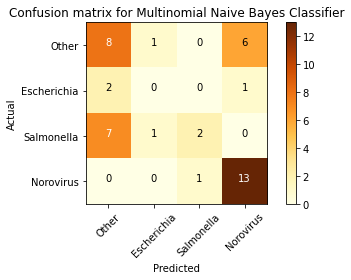

In [9]:
from sklearn.naive_bayes import MultinomialNB
MyModelNB= MultinomialNB()
MyModelNB.fit(TrainDF_nolabels, TrainLabels)
Prediction = MyModelNB.predict(TestDF)
print("\nThe prediction from NB is:")
print(Prediction)
print("\nThe actual labels are:")
print(TestLabels)
## confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(TestLabels, Prediction,labels=['Other', 'Escherichia' ,'Salmonella' ,'Norovirus'])
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Other', 'Escherichia' ,'Salmonella' ,'Norovirus'],
                      title='Confusion matrix for Multinomial Naive Bayes Classifier')
print("\nClassification Report:\n")
evaluate_model(MyModelNB, TestDF, TestLabels)

### Bernoulli Naive Bayes Classifier


Bernoulli prediction:
 ['Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Norovirus' 'Norovirus'
 'Norovirus' 'Norovirus' 'Salmonella' 'Norovirus' 'Norovirus' 'Salmonella'
 'Norovirus' 'Norovirus' 'Norovirus' 'Norovirus' 'Norovirus' 'Norovirus'
 'Norovirus' 'Salmonella' 'Salmonella' 'Norovirus' 'Norovirus' 'Norovirus'
 'Norovirus' 'Salmonella' 'Norovirus' 'Salmonella' 'Salmonella'
 'Norovirus' 'Salmonella']

Actual:
0           Other
1           Other
2           Other
3           Other
4           Other
5           Other
6           Other
7     Escherichia
8      Salmonella
9           Other
10          Other
11     Salmonella
12     Salmonella
13     Salmonella
14     Salmonella
15      Norovirus
16      Norovirus
17      Norovirus
18      Norovirus
19      Norovirus
20      Norovirus
21          Other
22     Salmonella
23      Norovirus
24          Other
25      Norovirus
26      Norovirus
27      Norovirus
28 

/Users/nikkkikong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

 Escherichia       0.00      0.00      0.00         3
   Norovirus       0.63      0.86      0.73        14
       Other       0.60      0.60      0.60        15
  Salmonella       0.62      0.50      0.56        10

    accuracy                           0.62        42
   macro avg       0.46      0.49      0.47        42
weighted avg       0.57      0.62      0.59        42



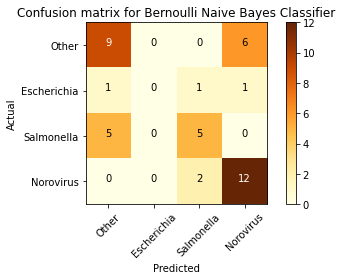

In [10]:
from sklearn.naive_bayes import BernoulliNB
## Bernoulli uses 0 and 1 data (not counts)
## So - we need to re-format our data first
## Make a COPY of the DF
TrainDF_nolabels_Binary=TrainDF_nolabels.copy()   ## USE .copy()
TrainDF_nolabels_Binary[TrainDF_nolabels_Binary >= 1] = 1
TrainDF_nolabels_Binary[TrainDF_nolabels_Binary < 1] = 0
BernModel = BernoulliNB()
BernModel.fit(TrainDF_nolabels_Binary, TrainLabels)
#BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
print("\nBernoulli prediction:\n", BernModel.predict(TestDF))
print("\nActual:")
print(TestLabels)
bn_matrix = confusion_matrix(TestLabels, BernModel.predict(TestDF),labels=['Other', 'Escherichia' ,'Salmonella' ,'Norovirus'])
plt.figure()
plot_confusion_matrix(bn_matrix, classes=['Other', 'Escherichia' ,'Salmonella' ,'Norovirus'],
                      title='Confusion matrix for Bernoulli Naive Bayes Classifier')
print("\nClassification Report:\n")
evaluate_model(BernModel, TestDF, TestLabels)

### SVM Classifier with a Linear Kernel

/Users/nikkkikong/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVM prediction:
 ['Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Salmonella' 'Norovirus'
 'Norovirus' 'Norovirus' 'Norovirus' 'Norovirus' 'Norovirus' 'Norovirus'
 'Norovirus' 'Norovirus' 'Norovirus' 'Norovirus' 'Norovirus' 'Norovirus'
 'Norovirus' 'Norovirus' 'Norovirus' 'Norovirus' 'Norovirus' 'Norovirus'
 'Norovirus' 'Norovirus' 'Norovirus' 'Norovirus' 'Norovirus' 'Salmonella'
 'Norovirus' 'Salmonella']
Actual:
0           Other
1           Other
2           Other
3           Other
4           Other
5           Other
6           Other
7     Escherichia
8      Salmonella
9           Other
10          Other
11     Salmonella
12     Salmonella
13     Salmonella
14     Salmonella
15      Norovirus
16      Norovirus
17      Norovirus
18      Norovirus
19      Norovirus
20      Norovirus
21          Other
22     Salmonella
23      Norovirus
24          Other
25      Norovirus
26      Norovirus
27      Norovirus
28          

/Users/nikkkikong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

 Escherichia       0.00      0.00      0.00         3
   Norovirus       0.56      1.00      0.72        14
       Other       0.64      0.60      0.62        15
  Salmonella       1.00      0.30      0.46        10

    accuracy                           0.62        42
   macro avg       0.55      0.48      0.45        42
weighted avg       0.65      0.62      0.57        42



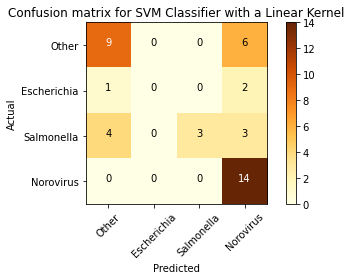

In [13]:
from sklearn.svm import LinearSVC
SVM_Model=LinearSVC(C=.1)
SVM_Model.fit(TrainDF_nolabels, TrainLabels)
#BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
print("SVM prediction:\n", SVM_Model.predict(TestDF))
print("Actual:")
print(TestLabels)

SVM_matrix = confusion_matrix(TestLabels, SVM_Model.predict(TestDF),labels=['Other', 'Escherichia' ,'Salmonella' ,'Norovirus'])
plt.figure()
plot_confusion_matrix(SVM_matrix, classes=['Other', 'Escherichia' ,'Salmonella' ,'Norovirus'],
                      title='Confusion matrix for SVM Classifier with a Linear Kernel')
print("\nClassification Report:\n")
evaluate_model(SVM_Model, TestDF, TestLabels)                                    

### SVM Classifier with a Polynomial Kernel

[LibSVM]SVM prediction:
 ['Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Norovirus' 'Other' 'Other' 'Other' 'Other' 'Norovirus'
 'Norovirus' 'Norovirus' 'Norovirus' 'Norovirus' 'Norovirus' 'Norovirus'
 'Norovirus' 'Norovirus' 'Norovirus' 'Norovirus' 'Norovirus' 'Norovirus'
 'Norovirus' 'Norovirus' 'Norovirus' 'Norovirus' 'Norovirus' 'Norovirus'
 'Norovirus' 'Norovirus' 'Norovirus' 'Norovirus' 'Norovirus' 'Other'
 'Norovirus' 'Other']
Actual:
0           Other
1           Other
2           Other
3           Other
4           Other
5           Other
6           Other
7     Escherichia
8      Salmonella
9           Other
10          Other
11     Salmonella
12     Salmonella
13     Salmonella
14     Salmonella
15      Norovirus
16      Norovirus
17      Norovirus
18      Norovirus
19      Norovirus
20      Norovirus
21          Other
22     Salmonella
23      Norovirus
24          Other
25      Norovirus
26      Norovirus
27      Norovirus
28          Oth

/Users/nikkkikong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


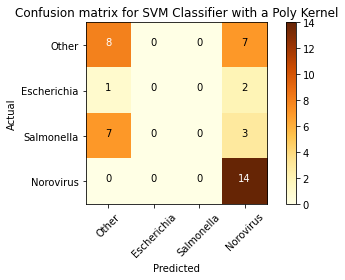

In [17]:
from sklearn.svm import SVC
SVM_Model=sklearn.svm.SVC(C=0.2, kernel='poly',degree=2,
                           gamma="auto", verbose=True)
SVM_Model.fit(TrainDF_nolabels, TrainLabels)
print("SVM prediction:\n", SVM_Model.predict(TestDF))
print("Actual:")
print(TestLabels)

SVM_matrix = confusion_matrix(TestLabels, SVM_Model.predict(TestDF),labels=['Other', 'Escherichia' ,'Salmonella' ,'Norovirus'])
plt.figure()
plot_confusion_matrix(SVM_matrix, classes=['Other', 'Escherichia' ,'Salmonella' ,'Norovirus'],
                      title='Confusion matrix for SVM Classifier with a Poly Kernel')
print("\nClassification Report:\n")
evaluate_model(SVM_Model, TestDF, TestLabels)    

### SVM Classifier with a Radial Kernel

[LibSVM]SVM prediction:
 ['Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Salmonella'
 'Salmonella' 'Other' 'Other' 'Other' 'Other' 'Salmonella' 'Other'
 'Norovirus' 'Norovirus' 'Norovirus' 'Norovirus' 'Other' 'Norovirus'
 'Norovirus' 'Salmonella' 'Norovirus' 'Norovirus' 'Other' 'Norovirus'
 'Other' 'Norovirus' 'Other' 'Salmonella' 'Norovirus' 'Norovirus'
 'Norovirus' 'Norovirus' 'Other' 'Other' 'Other' 'Other' 'Salmonella'
 'Norovirus' 'Other']
Actual:
0           Other
1           Other
2           Other
3           Other
4           Other
5           Other
6           Other
7     Escherichia
8      Salmonella
9           Other
10          Other
11     Salmonella
12     Salmonella
13     Salmonella
14     Salmonella
15      Norovirus
16      Norovirus
17      Norovirus
18      Norovirus
19      Norovirus
20      Norovirus
21          Other
22     Salmonella
23      Norovirus
24          Other
25      Norovirus
26      Norovirus
27      Norovirus
28          Other
29         

/Users/nikkkikong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


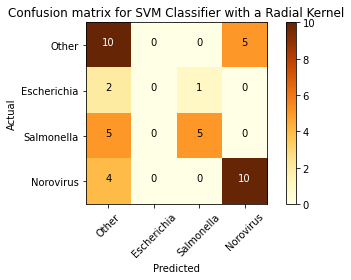

In [25]:
from sklearn.svm import SVC
SVM_Model=sklearn.svm.SVC(C=0.5, kernel='rbf', 
                           verbose=True, gamma="auto")
SVM_Model.fit(TrainDF_nolabels, TrainLabels)
print("SVM prediction:\n", SVM_Model.predict(TestDF))
print("Actual:")
print(TestLabels)

SVM_matrix = confusion_matrix(TestLabels, SVM_Model.predict(TestDF),labels=['Other', 'Escherichia' ,'Salmonella' ,'Norovirus'])
plt.figure()
plot_confusion_matrix(SVM_matrix, classes=['Other', 'Escherichia' ,'Salmonella' ,'Norovirus'],
                      title='Confusion matrix for SVM Classifier with a Radial Kernel')

print("\nClassification Report:\n")
evaluate_model(SVM_Model, TestDF, TestLabels)    